#Dataset:


In [63]:
from datasets import load_dataset # hugging face datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import wordcloud

In [64]:
# load dataset
dataset = load_dataset("nkazi/SciEntsBank")
df = dataset["train"].to_pandas()

# EDA

## data quality check

In [65]:
# data quality check
print("dataset shape:", df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())

dataset shape: (4969, 5)

Missing values per column:
id                  0
question            0
reference_answer    0
student_answer      0
label               0
dtype: int64


In [66]:
print("\nNumber of duplicate row:", df.duplicated().sum())


Number of duplicate row: 0


###Analysis of data quality
The results show that:
No null values were found in any of the columns.
No duplicated rows were detected in the dataset.

In [67]:
core_cols = ["question", "student_answer", "label"]
df = df[core_cols]

## Label Distribution

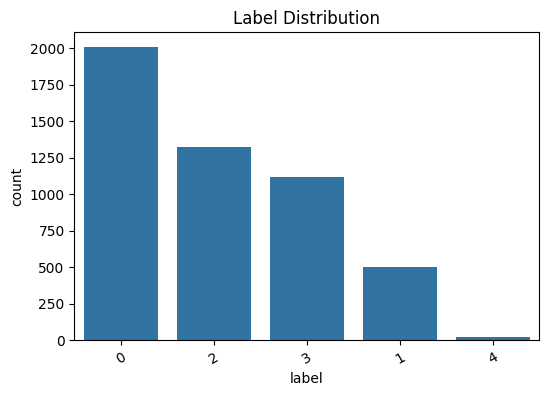

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(x="label", data=df, order=df["label"].value_counts().index)
plt.title("Label Distribution")
plt.xticks(rotation=30)
plt.show()

In [69]:
print("\nLabel distribution (normalized):")
print(df["label"].value_counts(normalize=True))


Label distribution (normalized):
label
0    0.404105
2    0.266452
3    0.224391
1    0.100423
4    0.004629
Name: proportion, dtype: float64


In [70]:
label_map = {
    0: "correct",
    1: "wrong",
    2: "partially_correct",
    3: "irrelevant",
    4: "contradictory"
}

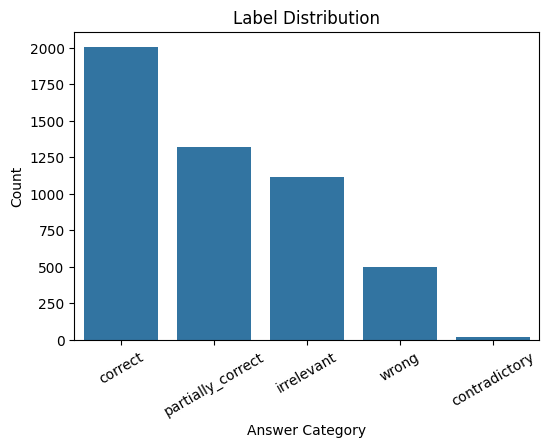

In [71]:
plt.figure(figsize=(6,4))
sns.countplot(
    x=df["label"].map(label_map),   # map without changing df
    order=df["label"].map(label_map).value_counts().index
)
plt.title("Label Distribution")
plt.xlabel("Answer Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

In [72]:
## Answer Length Distribution

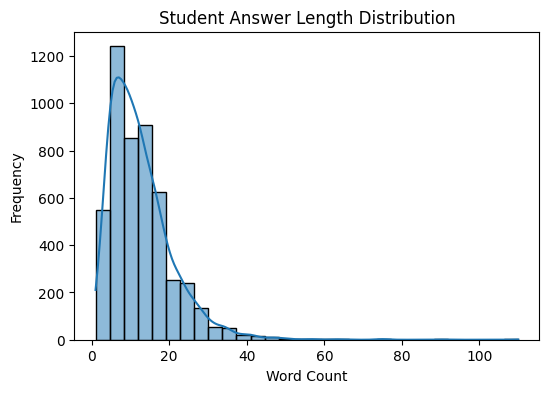

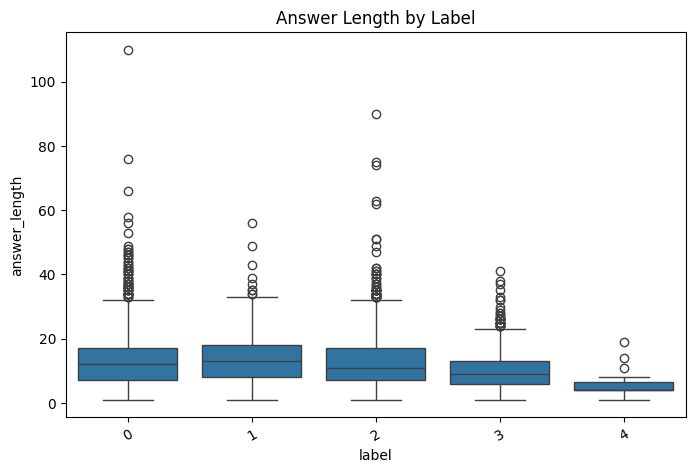

In [73]:
df["answer_length"] = df["student_answer"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,4))
sns.histplot(df["answer_length"], bins=30, kde=True)
plt.title("Student Answer Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Compare by label
plt.figure(figsize=(8,5))
sns.boxplot(x="label", y="answer_length", data=df)
plt.title("Answer Length by Label")
plt.xticks(rotation=30)
plt.show()

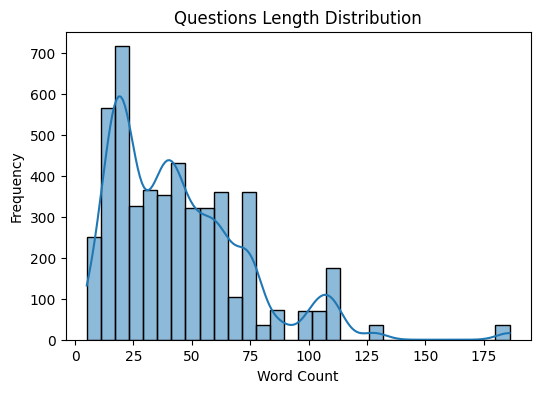

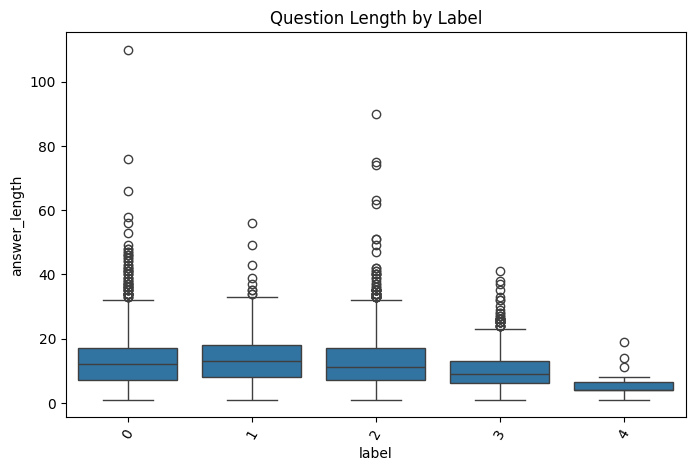

In [74]:
df["question_length"] = df["question"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,4))
sns.histplot(df["question_length"], bins=30, kde=True)
plt.title("Questions Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Compare by label
plt.figure(figsize=(8,5))
sns.boxplot(x="label", y="answer_length", data=df)
plt.title("Question Length by Label")
plt.xticks(rotation=60)
plt.show()

## word features


Top 20 frequent words:
[('the', 4825), ('it', 2000), ('is', 1999), ('and', 1755), ('a', 1484), ('because', 1130), ('to', 1031), ('Because', 890), ('of', 889), ('The', 885), ('will', 782), ('not', 687), ('in', 649), ('that', 628), ('you', 588), ('It', 558), ('are', 497), ('more', 488), ('has', 483), ('I', 460)]


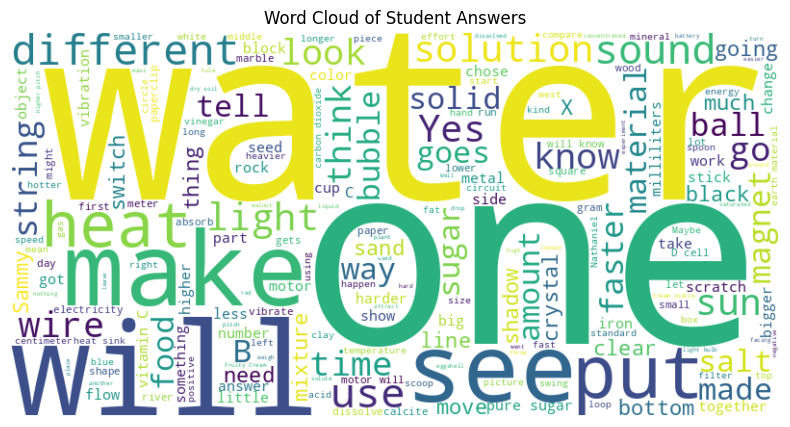

In [75]:
from wordcloud import WordCloud
# Simple tokenization by space
all_words = " ".join(df["student_answer"].astype(str)).split()
word_counts = Counter(all_words)

print("\nTop 20 frequent words:")
print(word_counts.most_common(20))

# Word cloud (overall)
wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Student Answers")
plt.show()

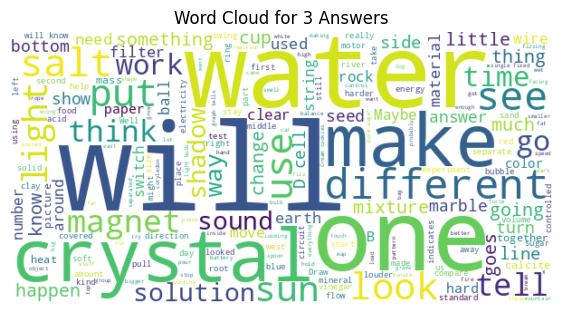

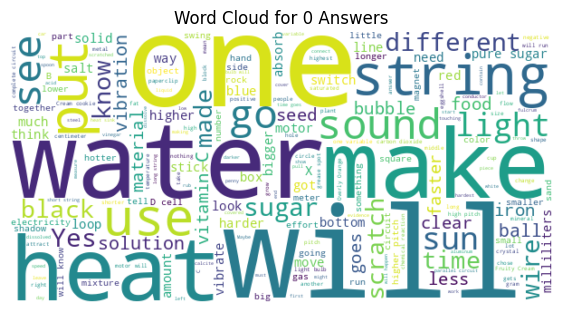

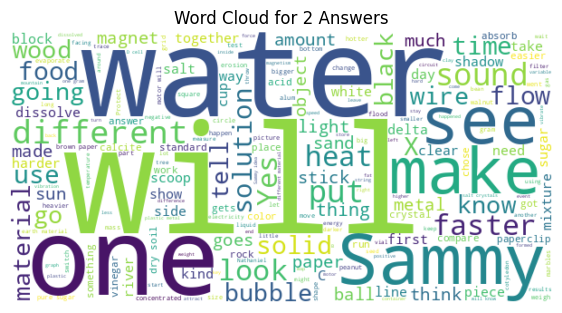

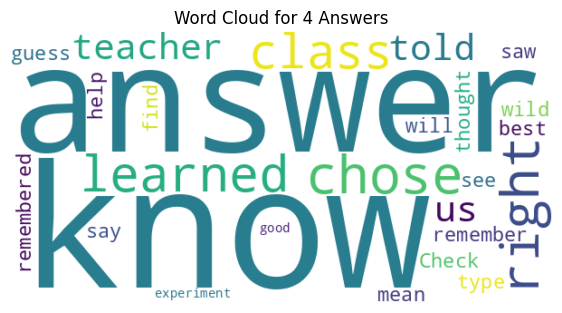

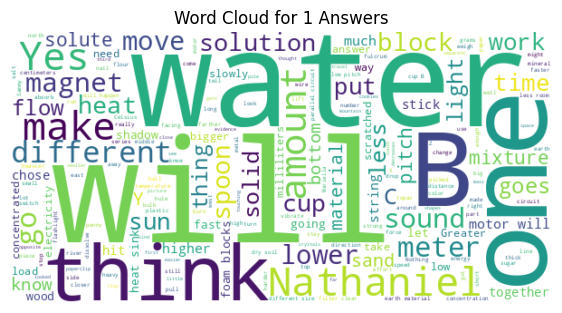

In [76]:
for label in df["label"].unique():
    subset_words = " ".join(df[df["label"] == label]["student_answer"].astype(str))
    wc = WordCloud(width=600, height=300, background_color="white").generate(subset_words)
    plt.figure(figsize=(7,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {label} Answers")
    plt.show()

### Analysis
Highlights the most common content words (other than the stopwords).
“The word cloud analysis shows that terms such as ‘water,’ ‘heat,’ and ‘one’ are dominant in correct answers. This suggests that the dataset primarily covers science-related domains, particularly biology, chemistry, and physics. This aligns with the design of the SciEntsBank dataset, which spans multiple scientific subject areas to evaluate short-answer grading across different disciplines.”

In [77]:
df.head(3)

,question,student_answer,label,answer_length,question_length
0,You used several methods to separate and ident...,By letting it sit in a dish for a day.,3,10,22
1,You used several methods to separate and ident...,Let the water evaporate and the salt is left b...,0,10,22
2,You used several methods to separate and ident...,The water evaporated and left salt crystals.,0,7,22
